# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, SimpleRNN
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import math
import matplotlib as mpl
from sklearn.metrics import mean_squared_error

### Read Dataset

In [2]:
dataset = pd.read_csv('data/ICICIBANK.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


In [3]:
dataset.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.789000e+03,4789.000000
mean,550.895392,551.558538,560.558556,541.534197,551.050980,550.995524,551.129031,8.224631e+06,3.759336e+14,138367.627443,4.183406e+06,0.473463
std,368.784064,368.890953,374.079697,363.389664,368.705647,368.725374,368.746905,1.218535e+07,4.759238e+14,99008.729009,6.365382e+06,0.131495
min,67.400000,67.000000,70.450000,66.000000,67.000000,67.400000,68.520000,7.409000e+03,9.617283e+10,2595.000000,1.501500e+04,0.099000
25%,267.562500,267.400000,271.912500,263.625000,267.400000,267.612500,267.577500,9.612055e+05,3.459444e+13,79312.250000,6.995020e+05,0.384300
50%,398.075000,399.000000,406.525000,392.450000,398.700000,398.175000,398.235000,3.486648e+06,2.923010e+14,110101.000000,1.963117e+06,0.476400
75%,873.562500,877.000000,888.775000,859.800000,874.600000,873.562500,873.510000,1.157202e+07,4.993528e+14,162953.500000,5.948817e+06,0.564100
max,1794.100000,1767.050000,1798.150000,1760.150000,1793.000000,1794.100000,1783.460000,2.868577e+08,1.461959e+16,949891.000000,2.325307e+08,0.983000


In [4]:
dataset.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     517
%Deliverble            517
dtype: int64

### Mengambil kolom tertentu saja pada dataset

In [5]:
df = dataset[[ 'Prev Close', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume']].copy()

In [6]:
df.head()

,Prev Close,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,
2000-01-03,69.20,74.75,71.40,74.75,74.75,73.20,286260
2000-01-04,74.75,78.50,71.00,73.25,73.05,73.38,296264
2000-01-05,73.05,73.50,67.50,70.00,69.50,70.85,227624
2000-01-06,69.50,74.00,69.55,69.75,70.05,72.04,275149
2000-01-07,70.05,72.50,66.00,67.00,67.40,68.72,138809


# Exploratory Data Analysis (EDA)

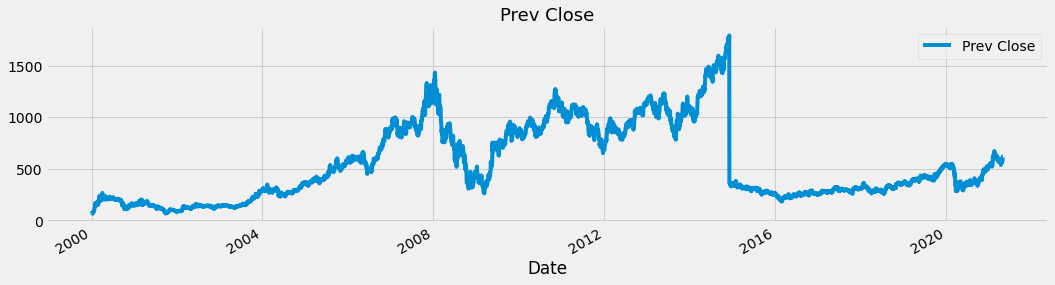

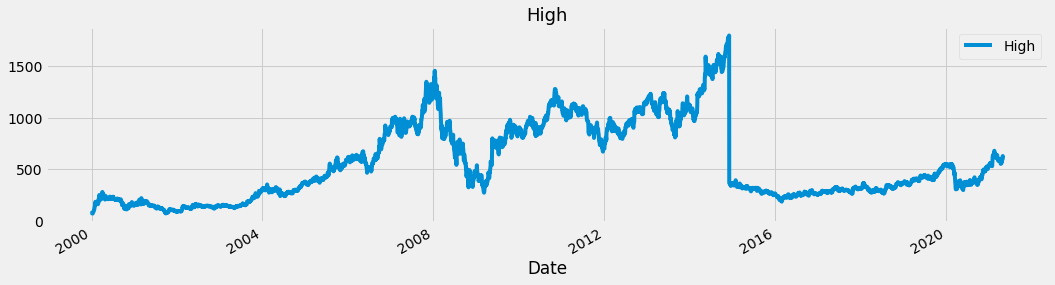

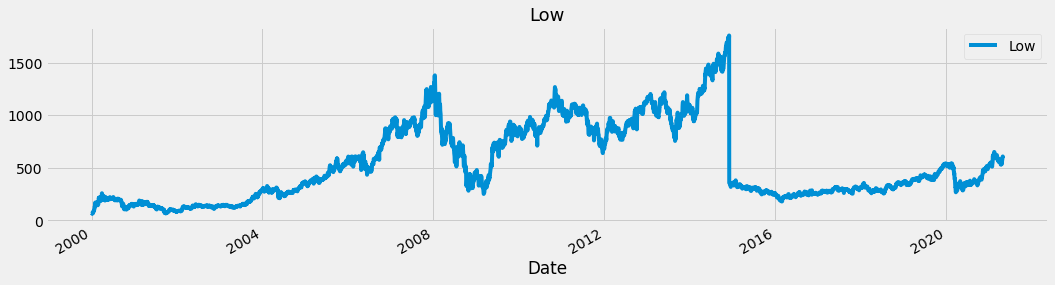

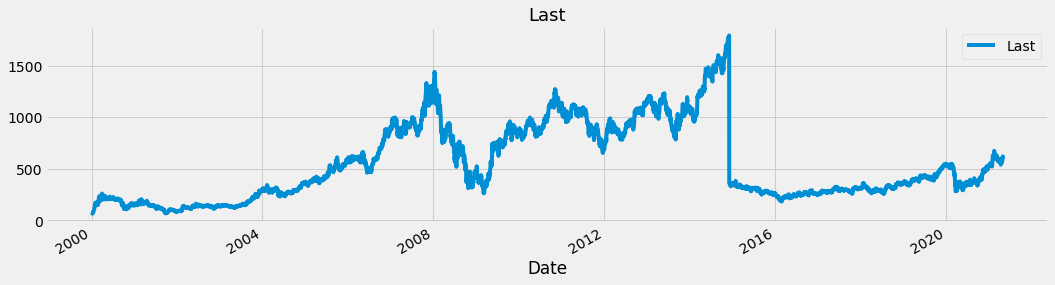

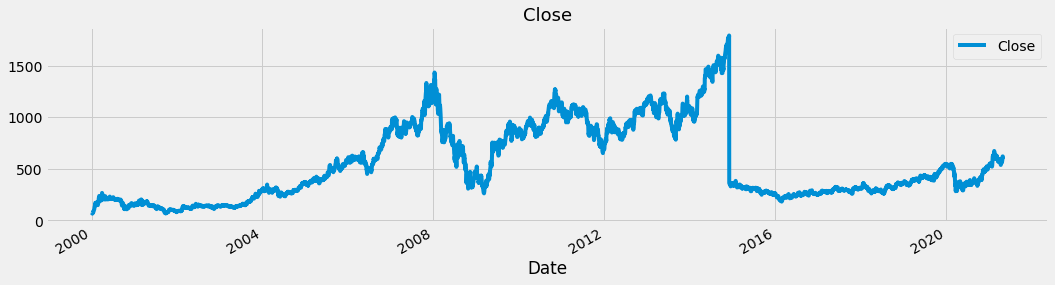

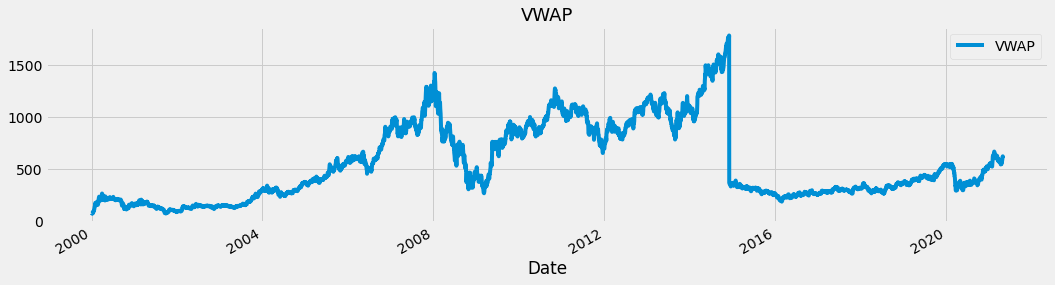

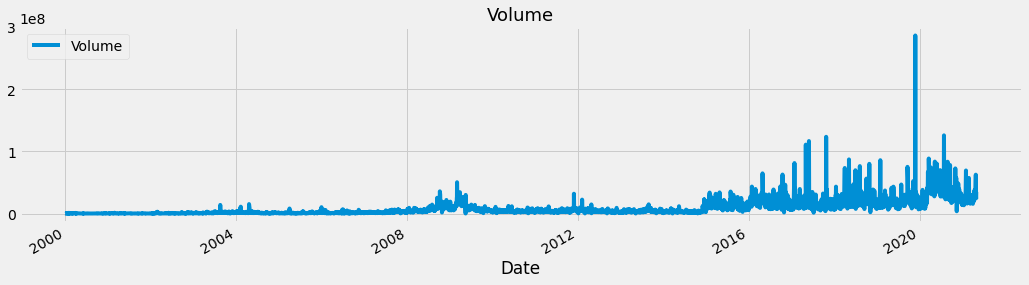

In [7]:
# Plotting each distribution
full_columns = ['Prev Close', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume']
for i in range(0, df.shape[1]):
    plt.figure(figsize=(16,7))
    df[full_columns[i]][:].plot(figsize=(16,4),legend=True)
    plt.title(full_columns[i], fontsize=18) 
    plt.show()

# Data Preprocessing

### Reshape Data menjadi Array 2D

In [8]:
df.shape

(5306, 7)

In [9]:
# Mengambil kolom VWAP dan mengubahnya menjadi array 2D
df_2d = df['VWAP'].values.reshape(5306,1)
print(df_2d.shape)
print(df_2d)

(5306, 1)
[[ 73.2 ]
 [ 73.38]
 [ 70.85]
 ...
 [612.57]
 [619.55]
 [607.02]]


### Scaling Data

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
df_2d = scaler.fit_transform(df_2d)

### Splitting Train dan Test Set

In [11]:
train_size = int(len(df_2d) * 0.7)
test_size = len(df_2d) - train_size
train, test = df_2d[0:train_size,:], df_2d[train_size:len(df_2d),:]
print(train.shape)
print(test.shape)

(3714, 1)
(1592, 1)


### Membuat Sequence

In [12]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [13]:
seq_size = 100

X_train, y_train = to_sequences(train, seq_size)
X_test, y_test = to_sequences(test, seq_size)

print("Shape of training set: {}".format(X_train.shape))
print("Shape of test set: {}".format(X_test.shape))

Shape of training set: (3613, 100)
Shape of test set: (1491, 100)


### Mengubah Data Train dan Test menjadi 3D

In [14]:
#Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train)
print(X_train.shape)

[[[2.72895845e-03]
  [2.83391839e-03]
  [1.35864812e-03]
  ...
  [8.21486466e-02]
  [8.04284698e-02]
  [8.18162735e-02]]

 [[2.83391839e-03]
  [1.35864812e-03]
  [2.05254994e-03]
  ...
  [8.04284698e-02]
  [8.18162735e-02]
  [8.19853756e-02]]

 [[1.35864812e-03]
  [2.05254994e-03]
  [1.16622156e-04]
  ...
  [8.18162735e-02]
  [8.19853756e-02]
  [8.41487166e-02]]

 ...

 [[7.96511831e-01]
  [7.85176158e-01]
  [7.81881582e-01]
  ...
  [9.46388795e-01]
  [9.34901513e-01]
  [9.39741332e-01]]

 [[7.85176158e-01]
  [7.81881582e-01]
  [7.82301422e-01]
  ...
  [9.34901513e-01]
  [9.39741332e-01]
  [9.43274983e-01]]

 [[7.81881582e-01]
  [7.82301422e-01]
  [7.97159084e-01]
  ...
  [9.39741332e-01]
  [9.43274983e-01]
  [9.41181616e-01]]]
(3613, 100, 1)


# LSTM Model

In [15]:
model = Sequential()

# LSTM layer Pertama dengan Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

# LSTM layer Kedua
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# LSTM layer Ketiga
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# LSTM layer Keempat
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=1))

# Compiling RNN
model.compile(optimizer='adam',loss='mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [16]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('./lstm_model_32epoch_100seq.h5', monitor = 'val_loss', verbose = 1, save_best_only = True, patience=21)

In [17]:
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100, steps_per_epoch = len(X_train)/32, callbacks = [checkp, reduce])

Epoch 1/100
113/112 [==============================] - ETA: 0s - loss: 0.0088 - rmse: 0.0939
Epoch 1: val_loss improved from inf to 0.00028, saving model to .\lstm_model_32epoch_100seq.h5
112/112 [==============================] - 41s 272ms/step - loss: 0.0088 - rmse: 0.0939 - val_loss: 2.7986e-04 - val_rmse: 0.0167 - lr: 0.0010
Epoch 2/100
113/112 [==============================] - ETA: 0s - loss: 0.0030 - rmse: 0.0547
Epoch 2: val_loss improved from 0.00028 to 0.00022, saving model to .\lstm_model_32epoch_100seq.h5
112/112 [==============================] - 28s 246ms/step - loss: 0.0030 - rmse: 0.0547 - val_loss: 2.1771e-04 - val_rmse: 0.0148 - lr: 0.0010
Epoch 3/100
113/112 [==============================] - ETA: 0s - loss: 0.0025 - rmse: 0.0502
Epoch 3: val_loss did not improve from 0.00022
112/112 [==============================] - 28s 244ms/step - loss: 0.0025 - rmse: 0.0502 - val_loss: 2.8629e-04 - val_rmse: 0.0169 - lr: 0.0010
Epoch 4/100
113/112 [==============================

# Model Evaluation

Text(0.5, 1.0, 'Model RMSE berdasarkan Epoch')

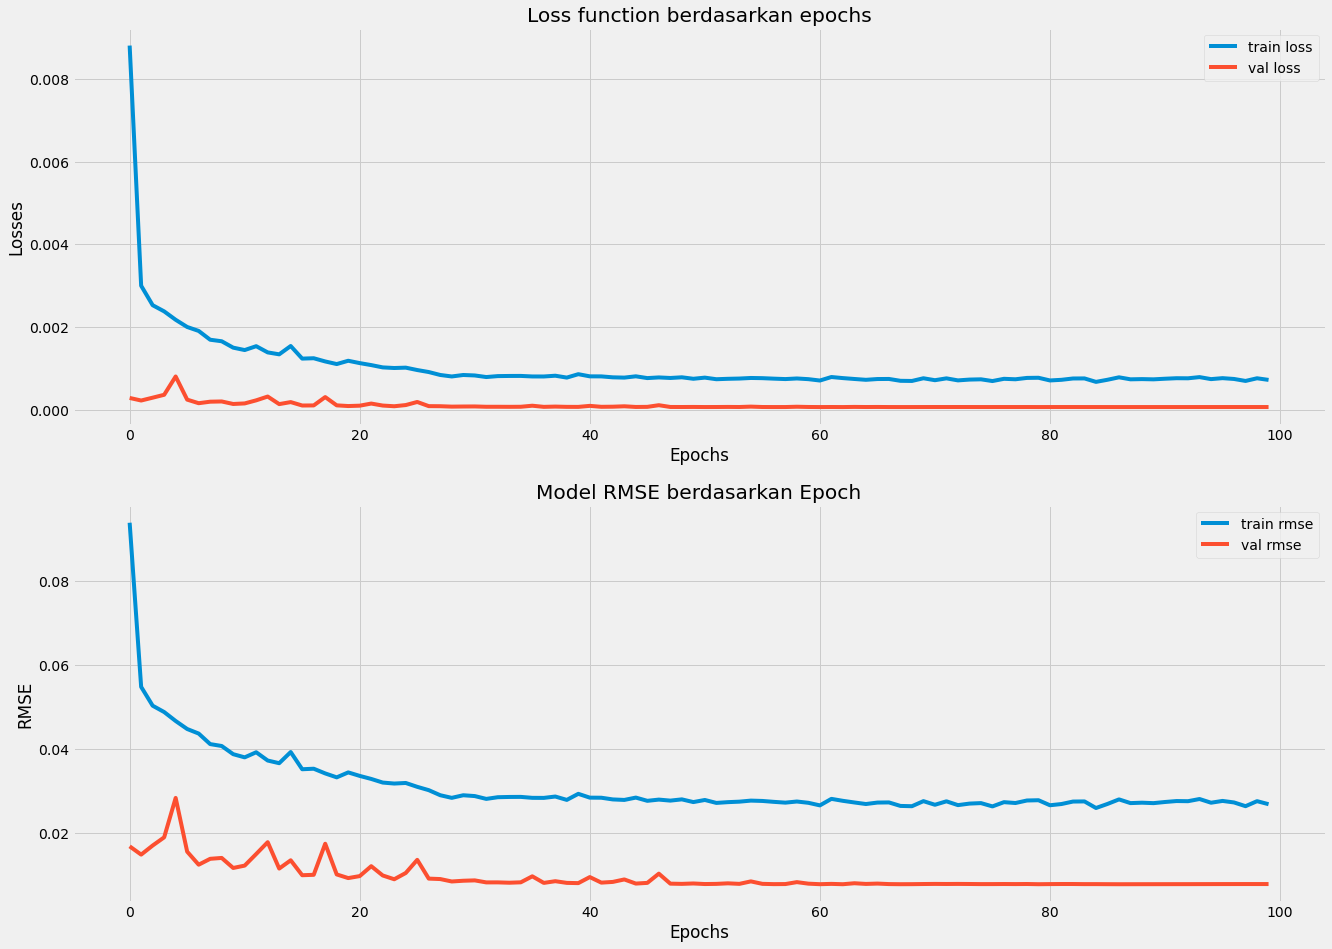

In [19]:
plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function berdasarkan epochs')

plt.subplot(2,1,2)
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(['train rmse' , 'val rmse'])
plt.title('Model RMSE berdasarkan Epoch')

### Memprediksi Model Train dan Test

In [20]:
def plot_predictions(title, test,predicted):
    plt.figure(figsize = (20,10))
    plt.plot(test, color='red',label='Actual')
    plt.plot(predicted, color='blue',label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [21]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

In [23]:
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('RMSE Score: %.2f' % (testScore))

RMSE Score: 13.27


In [24]:
# plot_predictions('ICICIBANK Stock Price Prediction - Train Data', trainY[0], trainPredict[:,0])

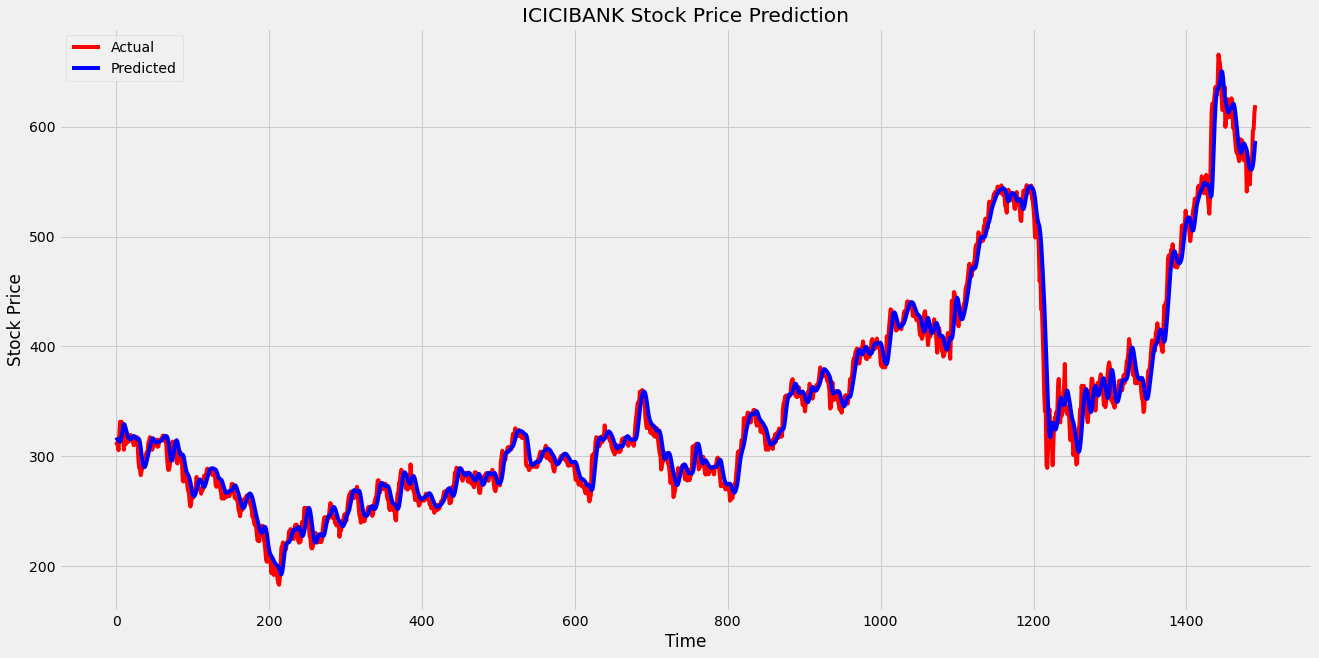

In [25]:
plot_predictions('ICICIBANK Stock Price Prediction', testY[0], testPredict[:,0])